In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [44]:
train = pd.read_csv('data/train_ozone.csv')
test = pd.read_csv('data/test_ozone.csv')
submission = pd.read_csv('submissions/submission.csv')

In [45]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [4]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<AxesSubplot:>

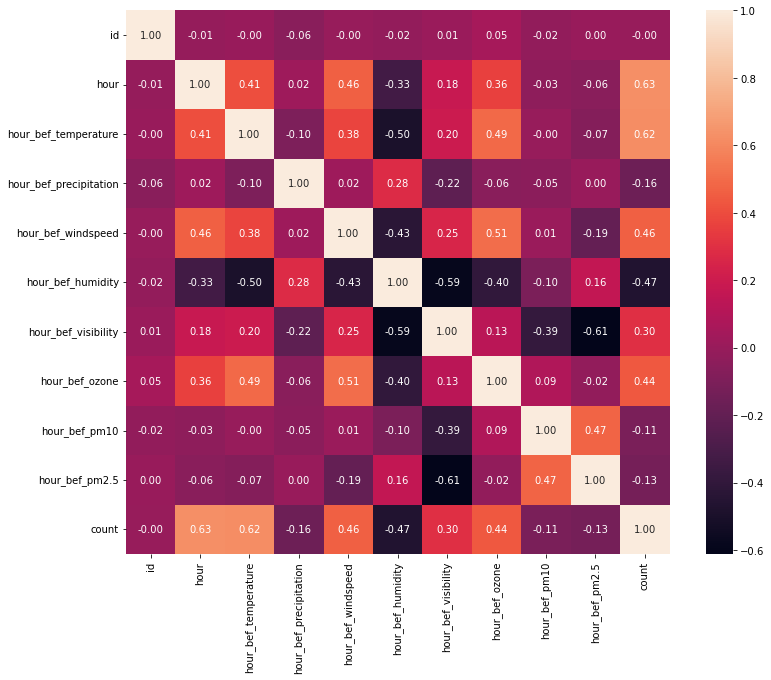

In [5]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='count'>

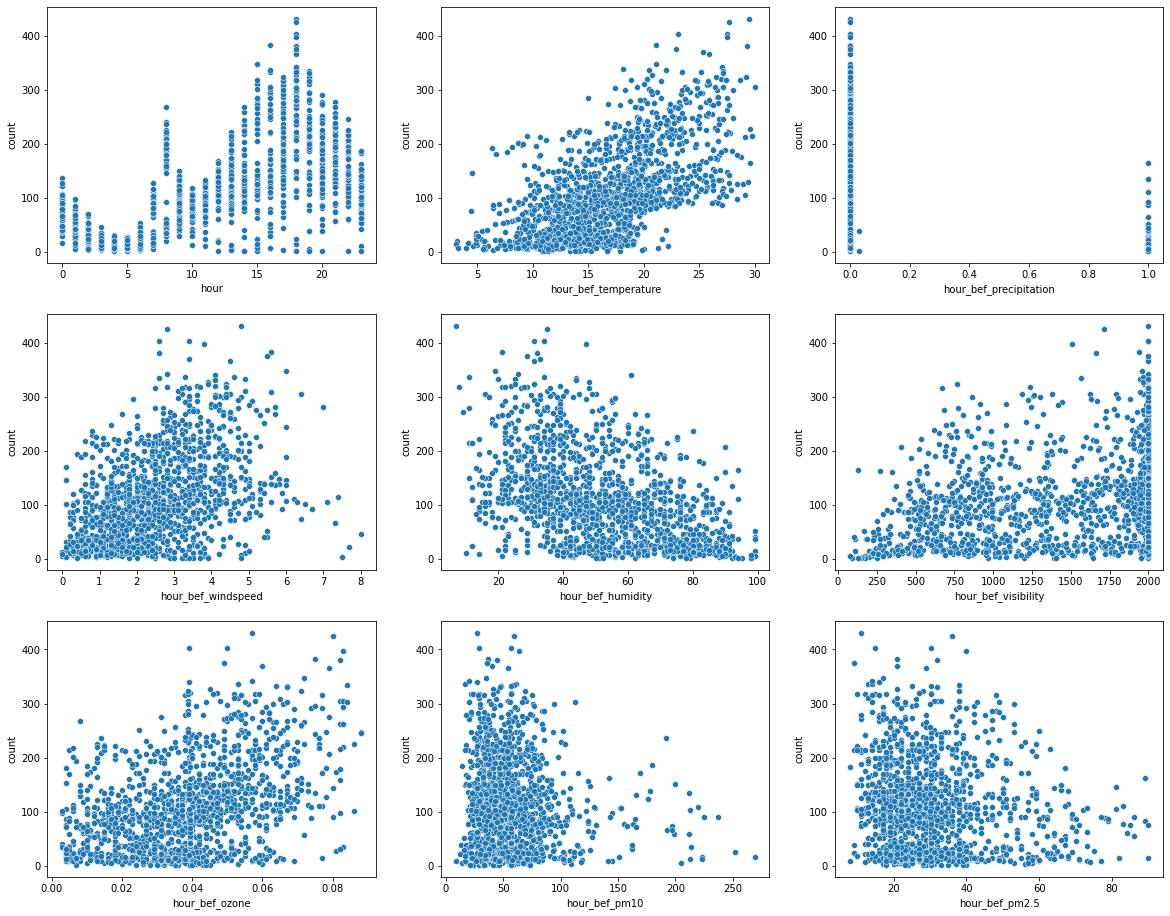

In [6]:
cat_columns = ["hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))

sns.scatterplot(data = train, x = 'hour', y = 'count', ax = axes[0][0])
sns.scatterplot(data = train, x = 'hour_bef_temperature', y = 'count', ax = axes[0][1])
sns.scatterplot(data = train, x = 'hour_bef_precipitation', y = 'count', ax = axes[0][2])
sns.scatterplot(data = train, x = 'hour_bef_windspeed', y = 'count', ax = axes[1][0])
sns.scatterplot(data = train, x = 'hour_bef_humidity', y = 'count', ax = axes[1][1])
sns.scatterplot(data = train, x = 'hour_bef_visibility', y = 'count', ax = axes[1][2])
sns.scatterplot(data = train, x = 'hour_bef_ozone', y = 'count', ax = axes[2][0])
sns.scatterplot(data = train, x = 'hour_bef_pm10', y = 'count', ax = axes[2][1])
sns.scatterplot(data = train, x = 'hour_bef_pm2.5', y = 'count', ax = axes[2][2])

In [46]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [47]:
outlier_iqr(train,'hour_bef_pm10')

data_hour_bef_pm10 = train[(train['hour_bef_pm10'] < upper) & (train['hour_bef_pm10'] > lower)]
len(data_hour_bef_pm10)

IQR은 31.0 이다.
lower bound 값은 -9.5 이다.
upper bound 값은 114.5 이다.
총 이상치 개수는 59 이다.


1400

C:\Users\Playdata\anaconda3_NR\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


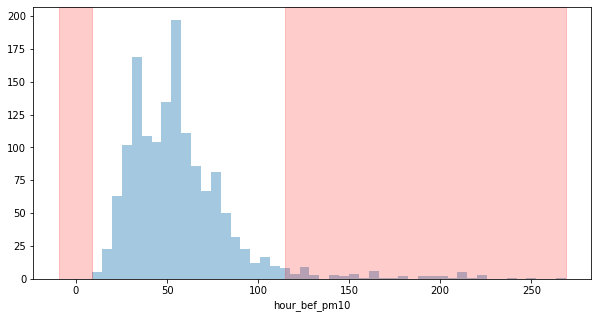

In [48]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_pm10, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_pm10.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_pm10.max(), alpha=0.2, color='red')

In [49]:
outlier_iqr(train,'hour_bef_pm2.5')

data_hour_bef_pm2 = train[(train['hour_bef_pm2.5'] < upper) & (train['hour_bef_pm2.5'] > lower)]
len(data_hour_bef_pm2)

IQR은 15.0 이다.
lower bound 값은 -1.5 이다.
upper bound 값은 58.5 이다.
총 이상치 개수는 88 이다.


1371

In [50]:
outlier_iqr(train,'hour_bef_visibility')

data_hour_bef_visibility = train[(train['hour_bef_visibility'] < upper) & (train['hour_bef_visibility'] > lower)]
len(data_hour_bef_visibility)

IQR은 1114.0 이다.
lower bound 값은 -791.0 이다.
upper bound 값은 3665.0 이다.
총 이상치 개수는 0 이다.


1459

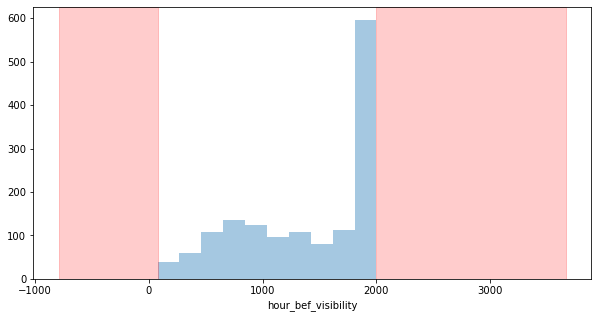

In [51]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_visibility, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_visibility.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_visibility.max(), alpha=0.2, color='red')

## 미세먼지 이상치 제거

- hour_bef_pm10

In [52]:
train['hour_bef_pm10'] = data_hour_bef_pm10['hour_bef_pm10']

In [53]:
train['hour_bef_pm10'].isnull().sum()

59

In [54]:
train['hour_bef_pm10'].fillna(value = train.groupby('hour').mean()['hour_bef_pm10'].mean(), inplace = True)

In [55]:
train['hour_bef_pm10'].isnull().sum()

0

- hour_bef_pm2.5

In [56]:
train['hour_bef_pm2.5'] = data_hour_bef_pm2['hour_bef_pm2.5']

In [57]:
train['hour_bef_pm2.5'].isnull().sum()

88

In [58]:
train['hour_bef_pm2.5'].fillna(value = train.groupby('hour').mean()['hour_bef_pm2.5'].mean(), inplace = True)

In [59]:
train['hour_bef_pm2.5'].isnull().sum()

0

## test set

In [60]:
outlier_iqr(test,'hour_bef_pm10')

data_hour_bef_pm10 = test[(test['hour_bef_pm10'] < upper) & (test['hour_bef_pm10'] > lower)]
len(data_hour_bef_pm10)

IQR은 16.0 이다.
lower bound 값은 4.0 이다.
upper bound 값은 68.0 이다.
총 이상치 개수는 10 이다.


705

In [61]:
outlier_iqr(test,'hour_bef_pm2.5')

data_hour_bef_pm2 = test[(test['hour_bef_pm2.5'] < upper) & (test['hour_bef_pm2.5'] > lower)]
len(data_hour_bef_pm2)

IQR은 13.0 이다.
lower bound 값은 -2.5 이다.
upper bound 값은 49.5 이다.
총 이상치 개수는 12 이다.


703

## testset 미세먼지 이상치 제거

In [62]:
test['hour_bef_pm10'] = data_hour_bef_pm10['hour_bef_pm10']

In [63]:
test['hour_bef_pm10'].isnull().sum()

10

In [64]:
test['hour_bef_pm10'].fillna(value = test.groupby('hour').mean()['hour_bef_pm10'].mean(), inplace = True)

In [65]:
test['hour_bef_pm10'].isnull().sum()

0

In [66]:
test['hour_bef_pm2.5'] = data_hour_bef_pm2['hour_bef_pm2.5']

In [67]:
test['hour_bef_pm2.5'].isnull().sum()

12

In [68]:
test['hour_bef_pm2.5'].fillna(value = test.groupby('hour').mean()['hour_bef_pm2.5'].mean(), inplace = True)

In [69]:
test['hour_bef_pm2.5'].isnull().sum()

0

## 데이터 범주화

In [70]:
hour = train['hour']
hour

0       20
1       13
2        6
3       23
4       18
        ..
1454     4
1455     3
1456     5
1457    21
1458    17
Name: hour, Length: 1459, dtype: int64

In [71]:
bins = [0, 4, 8, 12, 16, 20, 24]
A = pd.cut(hour, bins, labels = ["새벽", "출근시간대", "오전", "오후", "퇴근시간대", "저녁"])
A

0       퇴근시간대
1          오후
2       출근시간대
3          저녁
4       퇴근시간대
        ...  
1454       새벽
1455       새벽
1456    출근시간대
1457       저녁
1458    퇴근시간대
Name: hour, Length: 1459, dtype: category
Categories (6, object): ['새벽' < '출근시간대' < '오전' < '오후' < '퇴근시간대' < '저녁']

<AxesSubplot:>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

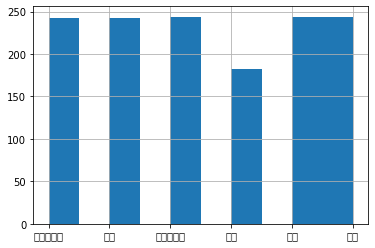

In [72]:
A.hist()

In [73]:
train['hour_cat'] = A
train['hour_cat']

0       퇴근시간대
1          오후
2       출근시간대
3          저녁
4       퇴근시간대
        ...  
1454       새벽
1455       새벽
1456    출근시간대
1457       저녁
1458    퇴근시간대
Name: hour_cat, Length: 1459, dtype: category
Categories (6, object): ['새벽' < '출근시간대' < '오전' < '오후' < '퇴근시간대' < '저녁']

In [74]:
train['hour_cat'].value_counts()

새벽       244
출근시간대    244
오전       244
퇴근시간대    243
오후       242
저녁       182
Name: hour_cat, dtype: int64

In [75]:
train.groupby('hour_cat').mean()['count']

hour_cat
새벽        28.479508
출근시간대     59.180328
오전        93.143443
오후       144.173554
퇴근시간대    204.012346
저녁       140.148352
Name: count, dtype: float64

<AxesSubplot:xlabel='hour_cat', ylabel='count'>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io,

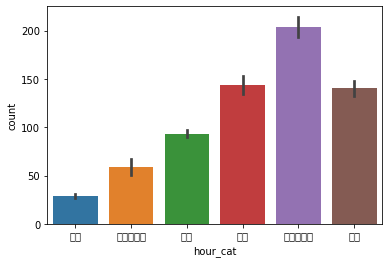

In [76]:
sns.barplot(data = train, x = 'hour_cat', y = 'count')

## One-Hot-Encoding

In [77]:
train_cat = train[['hour_cat']]  # 두 번 색인해서 2차원으로 만들어줄 수 있다.
train_cat

,hour_cat
0,퇴근시간대
1,오후
2,출근시간대
3,저녁
4,퇴근시간대
...,...
1454,새벽
1455,새벽
1456,출근시간대
1457,저녁


In [79]:
# pandas
train = pd.get_dummies(data = train, columns=['hour_cat'], prefix='hour')

In [80]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,hour_새벽,hour_출근시간대,hour_오전,hour_오후,hour_퇴근시간대,hour_저녁
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.000000,49.0,0,0,0,0,1,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.000000,159.0,0,0,0,1,0,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.000000,26.0,0,1,0,0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,27.848048,57.0,0,0,0,0,0,1
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.000000,431.0,0,0,0,0,1,0


## testset 원핫인코딩

In [81]:
hour = test['hour']
hour

0       7
1      17
2      13
3       6
4      22
       ..
710     1
711     1
712     9
713    16
714     8
Name: hour, Length: 715, dtype: int64

In [82]:
bins = [0, 4, 8, 12, 16, 20, 24]
A = pd.cut(hour, bins, labels = ["새벽", "출근시간대", "오전", "오후", "퇴근시간대", "저녁"])
A

0      출근시간대
1      퇴근시간대
2         오후
3      출근시간대
4         저녁
       ...  
710       새벽
711       새벽
712       오전
713       오후
714    출근시간대
Name: hour, Length: 715, dtype: category
Categories (6, object): ['새벽' < '출근시간대' < '오전' < '오후' < '퇴근시간대' < '저녁']

<AxesSubplot:>

C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata\anaconda3_NR\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

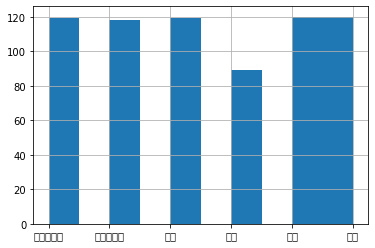

In [83]:
A.hist()

In [84]:
test['hour_cat'] = A
test['hour_cat']

0      출근시간대
1      퇴근시간대
2         오후
3      출근시간대
4         저녁
       ...  
710       새벽
711       새벽
712       오전
713       오후
714    출근시간대
Name: hour_cat, Length: 715, dtype: category
Categories (6, object): ['새벽' < '출근시간대' < '오전' < '오후' < '퇴근시간대' < '저녁']

In [85]:
test['hour_cat'].value_counts()

새벽       120
오전       120
출근시간대    119
오후       119
퇴근시간대    118
저녁        89
Name: hour_cat, dtype: int64

In [88]:
test = pd.get_dummies(data = test, columns=['hour_cat'], prefix='hour')

In [89]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_새벽,hour_출근시간대,hour_오전,hour_오후,hour_퇴근시간대,hour_저녁
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,0,1,0,0,0,0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,0,0,0,0,1,0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,0,0,0,1,0,0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,0,1,0,0,0,0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,0,0,0,0,0,1


## 훈련 데이터 분할

In [90]:
features = ['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone', 'hour_새벽',
            'hour_출근시간대', 'hour_오전', 'hour_오후', 'hour_퇴근시간대', 'hour_저녁']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_train.shape)

(1459, 11)
(1459,)
(1459, 11)


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}
rf_clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0: .4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 16}
최고 예측 정확도:  0.6673


In [93]:
model100 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, max_depth = 16, min_samples_split=16, 
                                 random_state = 0) 

model100.fit(X_train, y_train)

ypred = model100.predict(X_test)

In [94]:
submission['count'] = ypred
submission.to_csv("hour_onehot_to_six.csv", index = False)